In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Load CSV file
df = pd.read_csv(r"C:\Users\Akanksha\OneDrive\Pictures\문서\Sales-Analysis-Dashboard\titanic.csv")

# Preview first 5 rows
df.head()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Step 2: Explore the dataset
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())

# Summary statistics
print("\nSummary statistics:\n", df.describe())

# Check unique values in categorical columns
print("\nUnique values in 'Sex':", df['Sex'].unique())
print("Unique values in 'Embarked':", df['Embarked'].unique())


Shape of dataset: (891, 12)

Data types:
 PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Missing values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Summary statistics:
        PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.0

In [16]:
# Step 3: Data Cleaning (safe version)

# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with most common value
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin column if exists
df = df.drop(columns=['Cabin'], errors='ignore')

# Verify cleaning
print("Missing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


In [18]:
# Summary statistics
print(df.describe())

# Categorical column distributions
print(df['Sex'].value_counts())
print(df['Pclass'].value_counts())
print(df['Embarked'].value_counts())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Sex
male      577
female    314
Name: count, dtype: int64
Pclass
3    491
1    21

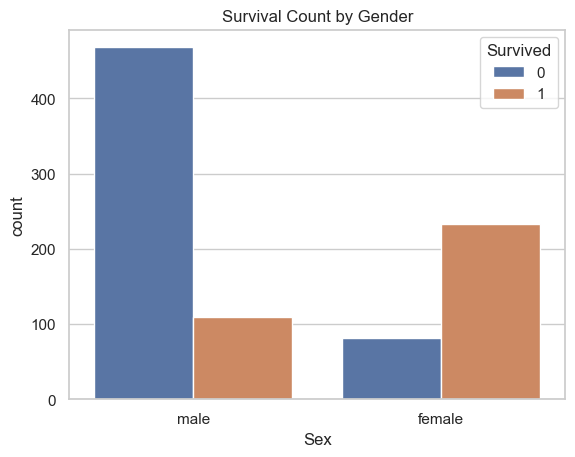

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Count by Gender')
plt.show()


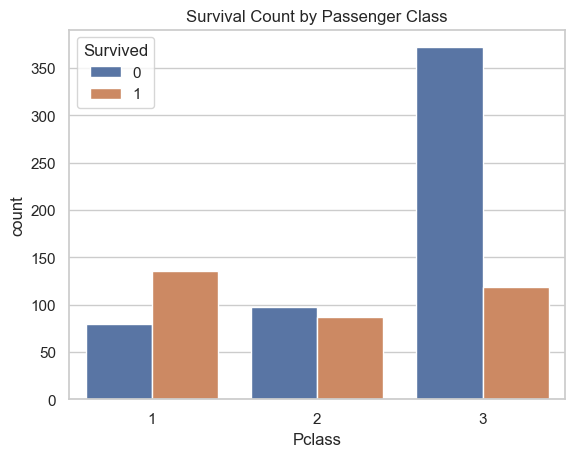

In [22]:
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.show()


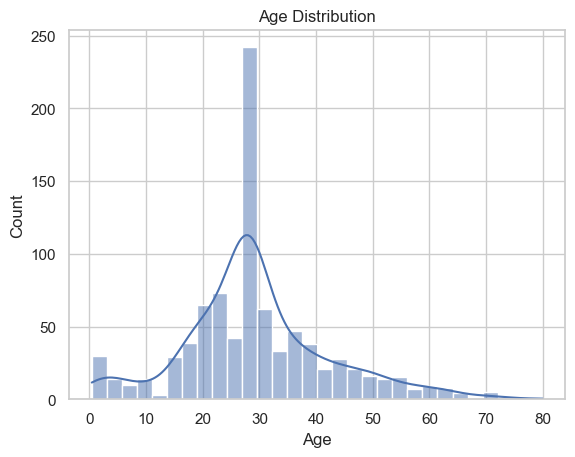

In [24]:
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


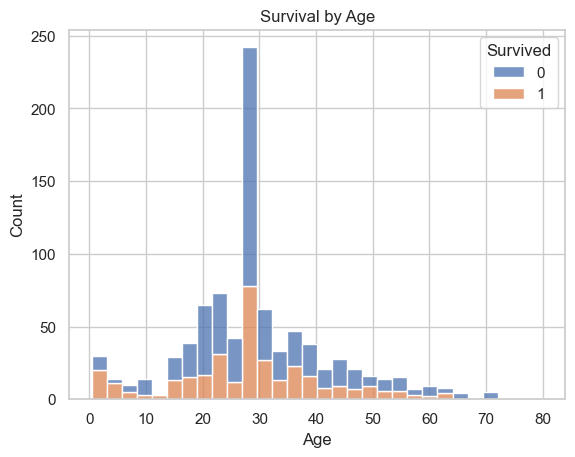

In [26]:
sns.histplot(data=df, x='Age', hue='Survived', multiple='stack')
plt.title('Survival by Age')
plt.show()


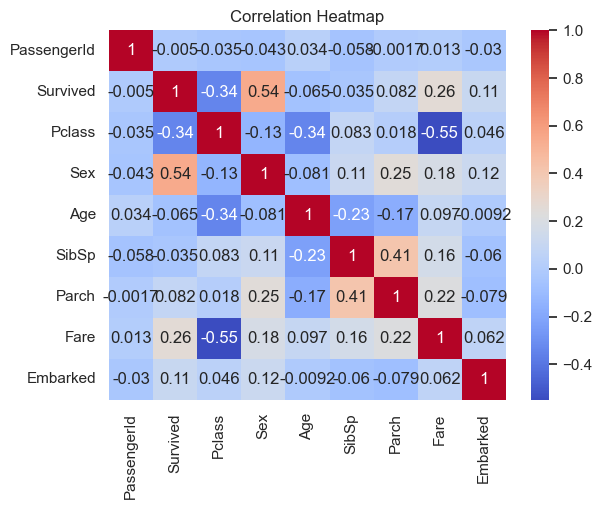

In [30]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Correlation heatmap
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()



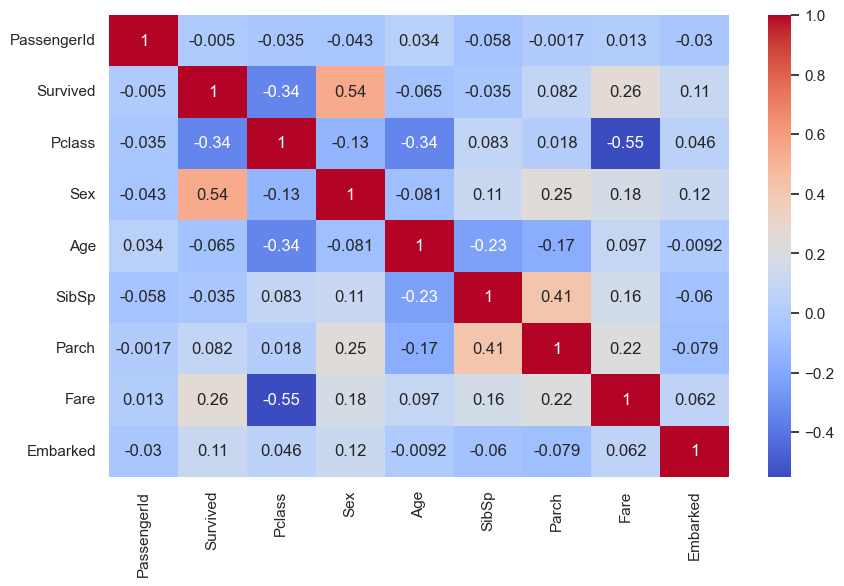

In [38]:
# Keep only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [44]:
%whos


Variable               Type            Data/Info
------------------------------------------------
LabelEncoder           type            <class 'sklearn.preproces<...>ing._label.LabelEncoder'>
dataframe_columns      function        <function dataframe_colum<...>ns at 0x000001F98282A840>
dataframe_hash         function        <function dataframe_hash at 0x000001F98E193240>
df                     DataFrame            PassengerId  Survive<...>\n[891 rows x 11 columns]
dtypes_str             function        <function dtypes_str at 0x000001F98E1936A0>
get_dataframes         function        <function get_dataframes at 0x000001F98E193740>
getpass                module          <module 'getpass' from 'C<...>ACONDA\\Lib\\getpass.py'>
hashlib                module          <module 'hashlib' from 'C<...>ACONDA\\Lib\\hashlib.py'>
import_pandas_safely   function        <function import_pandas_s<...>ly at 0x000001F98E301DA0>
is_data_frame          function        <function is_data_frame at 0x000001F

In [46]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


In [50]:
import os
os.listdir()


['.anaconda',
 '.bash_history',
 '.cache',
 '.conda',
 '.condarc',
 '.continuum',
 '.eclipse',
 '.gitconfig',
 '.idlerc',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.lesshst',
 '.live-transcribe',
 '.matplotlib',
 '.p2',
 '.redhat',
 '.vscode',
 'anaconda3',
 'AppData',
 'Application Data',
 'cd',
 'Contacts',
 'Cookies',
 'Desktop',
 'Documents',
 'Downloads',
 'eclipse',
 'eclipse-workspace',
 'Favorites',
 'Links',
 'Local Settings',
 'Music',
 'My Documents',
 'My_Projects',
 'NetHood',
 'NTUSER.DAT',
 'ntuser.dat.LOG1',
 'ntuser.dat.LOG2',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000001.regtrans-ms',
 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000002.regtrans-ms',
 'ntuser.ini',
 'OneDrive',
 'pdf-feedback-frontend',
 'pdf-feedback-system',
 'PrintHood',
 'python',
 'Recent',
 'Samatha',
 'Saved Games',
 'Searches',
 'SendTo',
 'Start Menu',
 'Temp

In [54]:
import pandas as pd

# Use raw string (r"...") to avoid issues with backslashes
file_path = r"C:\Users\Akanksha\OneDrive\Pictures\문서\Sales-Analysis-Dashboard\titanic.csv"

df = pd.read_csv(file_path)
print(df.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [56]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])
df['Embarked'] = label_encoder.fit_transform(df['Embarked'])


In [58]:
print(df.head())


   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare Cabin  Embarked  
0         A/5 21171   7.2500   NaN         2  
1          PC 17599  71.2833   C85         0  
2  STON/O2. 3101282   7.9250   NaN         2  
3            113803  53.1000  C123         2  
4            373450   8.0500   NaN         2  


In [60]:
X = df.drop('Survived', axis=1)  # all columns except Survived
y = df['Survived']


In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=1000)
)
model.fit(X_train, y_train)




Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression(max_iter=1000))])

In [81]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Define pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)


In [79]:
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)


In [83]:
# Define pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

# Fit pipeline on training data
pipeline.fit(X_train, y_train)

# Predict on test data
y_pred = pipeline.predict(X_test)


In [85]:
from sklearn.metrics import accuracy_score, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.776536312849162
Confusion Matrix:
 [[87 18]
 [22 52]]


In [87]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Precision: 0.7428571428571429
Recall: 0.7027027027027027
F1 Score: 0.7222222222222222

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.83      0.81       105
           1       0.74      0.70      0.72        74

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [89]:
y_probs = model.predict_proba(X_test)[:, 1]
y_pred_adjusted = (y_probs >= 0.4).astype(int)


In [91]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_probs)
print("AUC:", auc(fpr, tpr))


AUC: 0.862934362934363


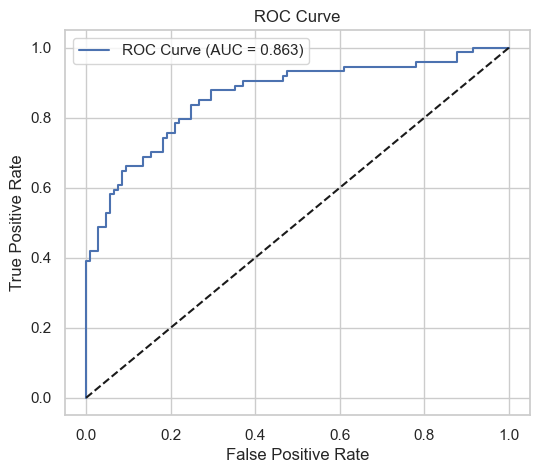

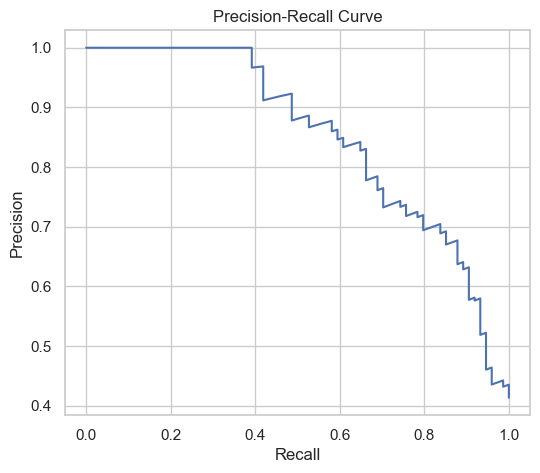

In [93]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Probabilities for Class 1
y_probs = model.predict_proba(X_test)[:, 1]

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
plt.figure(figsize=(6,5))
plt.plot(recall, precision)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.show()


In [97]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Drop last element so sizes match
precision = precision[:-1]
recall = recall[:-1]

mask = (precision >= 0.75) & (recall >= 0.75)

if mask.any():
    best_threshold = thresholds[mask][0]
    print("Chosen Threshold:", best_threshold)
    y_pred_custom = (y_probs >= best_threshold).astype(int)
else:
    print("No threshold found with both precision and recall >= 0.75")



No threshold found with both precision and recall >= 0.75


In [101]:
import pandas as pd
from sklearn.metrics import precision_recall_curve, precision_score, recall_score, f1_score, confusion_matrix

# Probabilities for Class 1
y_probs = model.predict_proba(X_test)[:, 1]

# Precision-recall-threshold values
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Remove last element to match thresholds length
precision = precision[:-1]
recall = recall[:-1]

# Store results
results = []
for p, r, t in zip(precision, recall, thresholds):
    f1 = 2 * (p * r) / (p + r) if (p + r) > 0 else 0
    results.append((t, p, r, f1))

df = pd.DataFrame(results, columns=["Threshold", "Precision", "Recall", "F1"])
best_row = df.loc[df["F1"].idxmax()]

best_threshold = best_row["Threshold"]
print(f"Best Threshold (Max F1): {best_threshold:.3f}")
print(best_row)

# Predictions with best threshold
y_pred_best = (y_probs >= best_threshold).astype(int)

# Evaluation with best threshold
print("\nMetrics at Best Threshold:")
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1:", f1_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Best Threshold (Max F1): 0.374
Threshold    0.374453
Precision    0.704545
Recall       0.837838
F1           0.765432
Name: 91, dtype: float64

Metrics at Best Threshold:
Precision: 0.7045454545454546
Recall: 0.8378378378378378
F1: 0.7654320987654321
Confusion Matrix:
 [[79 26]
 [12 62]]


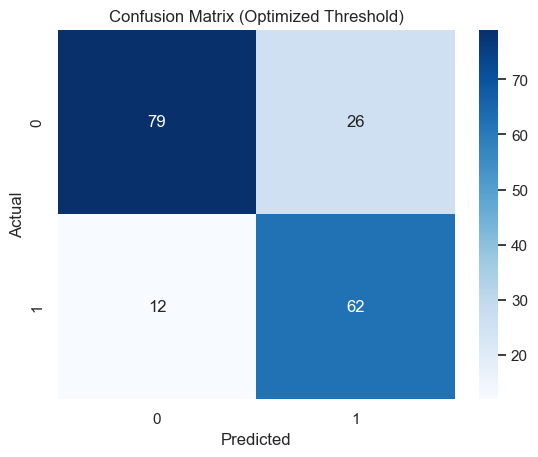

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Optimized Threshold)")
plt.show()
